# **Sentiment Analysis of IMDB Movie Reviews using RNN **  

## **1. Project Information**  
- **Project Title:** Sentiment Analysis of IMDB Movie Reviews using RNN (LSTM)  
- **Student Names & Enrollment Numbers:**  
  - Rajiv Ranjan (055038)  
  - Arnav Mehra (055030)  
- **Group Number:** 12  

## **2. Description of Data**  
This project uses the **IMDB Dataset of 50K Movie Reviews**, which contains 50,000 reviews labeled as **positive** or **negative**. The dataset is balanced, with an equal number of positive and negative reviews.  

- **Number of Reviews:** 50,000  
- **Columns:**  
  - **review:** The text of the movie review  
  - **sentiment:** The sentiment label (positive or negative)  

**Dataset Link:** [IMDB Movie Reviews Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)  

## **3. Project Objectives | Problem Statements**  
### **Objective:**  
Develop a **Recurrent Neural Network (RNN) using Long Short-Term Memory (LSTM)** to classify movie reviews into positive or negative sentiments.  

### **Problem Statements:**  
1. Can we accurately classify IMDB movie reviews using an RNN-based deep learning model?  
2. What preprocessing steps are necessary to improve the model's performance?  
3. How effective is an RNN (LSTM) compared to traditional machine learning methods for text classification?  
4. Can this model be generalized for sentiment analysis in other domains, such as product reviews or social media comments?  

## **4. Analysis of Data**  
### **Data Preprocessing Steps:**  
1. **Loading the Dataset**: The dataset is imported from Google Drive using `requests` and `pandas`.  
2. **Cleaning the Text**:  
   - **HTML Tags Removal**: Stripped using regex.  
   - **Non-Alphabetic Characters Removal**: Numbers, special characters removed.  
   - **Stopwords Removal**: Common words (e.g., "the", "is") removed using `nltk stopwords`.  
   - **Lowercasing**: All words converted to lowercase.  
3. **Tokenization**: The text is converted into sequences using the `Tokenizer` class.  
4. **Padding & Truncation**: Ensures uniform input size using `pad_sequences()`.  
5. **Sentiment Encoding**: Converts sentiment labels to binary (positive → `1`, negative → `0`).  
6. **Splitting Data**: 80% training, 20% testing (`train_test_split()`).  

## **5. Model Development**  
### **Model Type: Recurrent Neural Network (RNN) using LSTM**  
Recurrent Neural Networks (RNNs) are specialized for sequential data like text. **LSTM (Long Short-Term Memory)**, a type of RNN, is used because it effectively captures long-range dependencies in text.  

### **Model Architecture:**  
- **Embedding Layer:** Converts words into dense vectors of fixed size.  
- **LSTM Layer:** Captures long-term dependencies in text using memory cells.  
- **Dropout Layer:** Prevents overfitting by randomly dropping units during training.  
- **Fully Connected (Dense) Layer:** Classifies the review sentiment.  
- **Activation Function:**  
  - Sigmoid for binary classification.  
- **Loss Function:** Binary Crossentropy.  
- **Optimizer:** Adam.  

### **Hyperparameters Used:**  
- **Embedding Dimension:** 64  
- **LSTM Units:** 128  
- **Batch Size:** 128  
- **Epochs:** 5  
- **Random State for Reproducibility:** 55038  

### **Model Training & Performance:**  
- The model was trained for **5 epochs** using `ModelCheckpoint()` to save the best version.  
- **Training Accuracy:** ~85.68%  
- **Evaluation on Test Data:**  
  - Correct Predictions: **8,568**  
  - Incorrect Predictions: **1,432**  
  - **Final Accuracy:** **85.68%**  

## **6. Sentiment Prediction**  
After training the model, it was used to **predict sentiment for new movie reviews**.  

### **Steps for Prediction:**  
1. **User Input:** The model accepts a new movie review as input.  
2. **Preprocessing:**  
   - Non-alphabetic characters are removed using regex.  
   - Stopwords are filtered out.  
   - Text is converted to lowercase and tokenized.  
   - The sequence is padded to match the model's input length.  
3. **Prediction:** The preprocessed text is passed through the trained LSTM model.  
4. **Classification:**  
   - If the prediction score is **≥ 0.7**, the sentiment is classified as **positive**.  
   - Otherwise, the sentiment is classified as **negative**.  

### **Example Prediction Result:**  
1.Movie Review: The movie had stunning visuals and a great storyline.
Predicted Sentiment: Positive (0.85) in 0.3648 seconds.

2.Movie Review: The film was poorly directed and had terrible acting.
Predicted Sentiment: Negative (0.37) in 0.3648 seconds.

- The model **accurately distinguishes between positive and negative reviews**, achieving **high prediction confidence**.  

## **7. Managerial Insights & Recommendations**  
### **7.1 Managerial Insights**  
1. **Understanding Customer Sentiment Trends:**  
   - The model helps identify sentiment trends across thousands of reviews.  
   - Movie studios and streaming platforms can predict audience reactions before release.  
2. **Content Improvement Strategy:**  
   - Negative reviews highlight areas for improvement, such as acting or screenplay.  
   - Positive reviews indicate audience preferences.  
3. **Marketing & Promotions:**  
   - Movies with **high positive sentiment** can be aggressively marketed.  
   - Mixed or negative reviews require targeted promotions.  
4. **Competitive Analysis:**  
   - Compare sentiment across films to understand box office performance.  
5. **Audience Segmentation:**  
   - Personalize recommendations based on sentiment trends.  

### **7.2 Recommendations**  
1. **Enhance Data Collection & Processing:**  
   - Incorporate real-time sentiment analysis from multiple review platforms (Twitter, Rotten Tomatoes, etc.).  
   - Fine-tune using pre-trained NLP models like **BERT or GPT** for improved accuracy.  
2. **Deploy Model for Business Use:**  
   - Integrate into **movie streaming platforms** for real-time sentiment analysis.  
   - Build **interactive sentiment dashboards** for better decision-making.  
3. **Refine Model Performance:**  
   - Train on **larger datasets** for better generalization.  
   - Use **Bi-LSTM or Transformer models** for advanced sentiment analysis.  
4. **Expand Beyond Movie Reviews:**  
   - Apply sentiment analysis to **product reviews, customer feedback, brand reputation analysis, etc.**  
   - Businesses can improve **customer engagement and satisfaction** using similar models.  

---
**End of Report**


In [1]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re

<hr>
<i>Preview dataset</i>

In [2]:
import requests
import pandas as pd
from io import StringIO

# File ID from your Google Drive link
file_id = "16eKvgWRO5nHAWffIEzh5MESfKwu05frJ"
url = f"https://drive.google.com/uc?id={file_id}"

# Fetch the data
response = requests.get(url)
response.raise_for_status()  # Check for errors

# Convert response text to DataFrame
df = pd.read_csv(StringIO(response.text))

# Display first few rows
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


<hr>
<b>Stop Word</b> is a commonly used words in a sentence, usually a search engine is programmed to ignore this words (i.e. "the", "a", "an", "of", etc.)

<i>Declaring the english stop words</i>

In [3]:
import nltk
nltk.download('stopwords')

english_stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<hr>

### Load and Clean Dataset

In the original dataset, the reviews are still dirty. There are still html tags, numbers, uppercase, and punctuations. This will not be good for training, so in <b>load_dataset()</b> function, beside loading the dataset using <b>pandas</b>, I also pre-process the reviews by removing html tags, non alphabet (punctuations and numbers), stop words, and lower case all of the reviews.

### Encode Sentiments
In the same function, I also encode the sentiments into integers (0 and 1). Where 0 is for negative sentiments and 1 is for positive sentiments.

In [4]:
def preprocess_dataset(df):
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex=True)          # Remove HTML tags
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex=True)     # Remove non-alphabet characters
    x_data = x_data.apply(lambda review: ' '.join([w.lower() for w in review.split() if w.lower() not in english_stops]))  # Remove stopwords & lowercase text

    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.map({'positive': 1, 'negative': 0})  # Convert to binary labels

    return x_data, y_data

# Call function with your already loaded DataFrame
x_data, y_data = preprocess_dataset(df)

# Print a few samples
print('Reviews Sample:\n', x_data.head(), '\n')
print('Sentiment Sample:\n', y_data.head())


Reviews Sample:
 0    one reviewers mentioned watching oz episode ho...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
Name: review, dtype: object 

Sentiment Sample:
 0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64


<hr>

### Split Dataset
In this work, I decided to split the data into 80% of Training and 20% of Testing set using <b>train_test_split</b> method from Scikit-Learn. By using this method, it automatically shuffles the dataset. We need to shuffle the data because in the original dataset, the reviews and sentiments are in order, where they list positive reviews first and then negative reviews. By shuffling the data, it will be distributed equally in the model, so it will be more accurate for predictions.

<hr>
<i>Function for getting the maximum review length, by calculating the mean of all the reviews length (using <b>numpy.mean</b>)</i>

In [5]:
# Splitting Data into Train (80%) and Test (20%) Sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=55038, stratify=y_data)

# Display sample data
print("Train Set Sample:")
print(x_train.head(), '\n')
print(y_train.head(), '\n')

print("Test Set Sample:")
print(x_test.head(), '\n')
print(y_test.head())


Train Set Sample:
23073    let constructive criticism stop buying watchin...
30231    usually quite tolerant movies easily entertain...
2724     nothing could appealing idea good love story f...
43402    say watching dvds first season believe nbc gre...
23634    since part compering part one man many places ...
Name: review, dtype: object 

23073    1
30231    0
2724     0
43402    1
23634    0
Name: sentiment, dtype: int64 

Test Set Sample:
13256    although definitely read particular agatha chr...
31306    perhaps special reason fox child hit special n...
46247    movie one strongly recommend boy stanley yelna...
6734     say grand canyon one affecting films ever seen...
36463    five deadly venoms bloody violent story ricky ...
Name: review, dtype: object 

13256    1
31306    1
46247    1
6734     1
36463    1
Name: sentiment, dtype: int64


In [6]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

<hr>

### Tokenize and Pad/Truncate Reviews
A Neural Network only accepts numeric data, so we need to encode the reviews. I use <b>tensorflow.keras.preprocessing.text.Tokenizer</b> to encode the reviews into integers, where each unique word is automatically indexed (using <b>fit_on_texts</b> method) based on <b>x_train</b>. <br>
<b>x_train</b> and <b>x_test</b> is converted into integers using <b>texts_to_sequences</b> method.

Each reviews has a different length, so we need to add padding (by adding 0) or truncating the words to the same length (in this case, it is the mean of all reviews length) using <b>tensorflow.keras.preprocessing.sequence.pad_sequences</b>.


<b>post</b>, pad or truncate the words in the back of a sentence<br>
<b>pre</b>, pad or truncate the words in front of a sentence

In [7]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[  154 13928  2676 ...    12   587  1052]
 [  498    76 13033 ...     0     0     0]
 [   63    23  2189 ...    30  2576    76]
 ...
 [   19   104  1149 ...     0     0     0]
 [    6   689 32697 ...     6   287   211]
 [  268   316  7425 ...     0     0     0]] 

Encoded X Test
 [[  151   283   226 ...     0     0     0]
 [  266   187   175 ...  1688   713    69]
 [    1     3  2097 ...     0     0     0]
 ...
 [28279   830    79 ...     0     0     0]
 [  658   139  5336 ...     0     0     0]
 [60467   245    35 ...     0     0     0]] 

Maximum review length:  119


<hr>

### Build Architecture/Model
<b>Embedding Layer</b>: in simple terms, it creates word vectors of each word in the <i>word_index</i> and group words that are related or have similar meaning by analyzing other words around them.

<b>LSTM Layer</b>: to make a decision to keep or throw away data by considering the current input, previous output, and previous memory. There are some important components in LSTM.
<ul>
    <li><b>Forget Gate</b>, decides information is to be kept or thrown away</li>
    <li><b>Input Gate</b>, updates cell state by passing previous output and current input into sigmoid activation function</li>
    <li><b>Cell State</b>, calculate new cell state, it is multiplied by forget vector (drop value if multiplied by a near 0), add it with the output from input gate to update the cell state value.</li>
    <li><b>Ouput Gate</b>, decides the next hidden state and used for predictions</li>
</ul>

<b>Dense Layer</b>: compute the input with the weight matrix and bias (optional), and using an activation function. I use <b>Sigmoid</b> activation function for this work because the output is only 0 or 1.

The optimizer is <b>Adam</b> and the loss function is <b>Binary Crossentropy</b> because again the output is only 0 and 1, which is a binary number.

In [8]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  # Added Dropout


In [9]:
# HYPERPARAMETERS
EMBED_DIM = 64        # Embedding vector size
LSTM_UNITS = 128      # Number of LSTM units
DROPOUT_RATE = 0.3    # Dropout percentage

# Fixing Model Definition
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=EMBED_DIM, input_length=max_length))
model.add(LSTM(LSTM_UNITS, return_sequences=False))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build Model Explicitly
model.build(input_shape=(None, max_length))

# Print Summary
print(model.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 119, 64)             │       5,902,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,010,113 (22.93 MB)

 Trainable params: 6,010,113 (22.93 MB)

 Non-trainable params: 0 (0.00 B)

None


<hr>

### Training
For training, it is simple. We only need to fit our <b>x_train</b> (input) and <b>y_train</b> (output/label) data. For this training, I use a mini-batch learning method with a <b>batch_size</b> of <i>128</i> and <i>10</i> <b>epochs</b>.

Also, I added a callback called **checkpoint** to save the model locally for every epoch if its accuracy improved from the previous epoch.

In [10]:
checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [11]:
model.fit(x_train, y_train, batch_size = 128, epochs = 10, callbacks=[checkpoint])

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.5582 - loss: 0.6708
Epoch 1: accuracy improved from -inf to 0.64737, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 132s 409ms/step - accuracy: 0.5584 - loss: 0.6707
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.7589 - loss: 0.5184
Epoch 2: accuracy improved from 0.64737 to 0.71500, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 416ms/step - accuracy: 0.7587 - loss: 0.5185
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.8148 - loss: 0.4622
Epoch 3: accuracy improved from 0.71500 to 0.78817, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 414ms/step - accuracy: 0.8147 - loss: 0.4622
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.7044 - loss: 0.5224
Epoch 4: accuracy did not improve from 0.78817
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 410ms/step - accuracy: 0.7047 - loss: 0.5222
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.8498 - loss: 0.3689
Epoch 5: accuracy improved from 0.78817 to 0.85625, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 418ms/step - accuracy: 0.8498 - loss: 0.3690
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.8532 - loss: 0.3551
Epoch 6: accuracy did not improve from 0.85625
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 411ms/step - accuracy: 0.8531 - loss: 0.3553
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.7100 - loss: 0.5375
Epoch 7: accuracy did not improve from 0.85625
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 407ms/step - accuracy: 0.7102 - loss: 0.5374
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.8996 - loss: 0.2691
Epoch 8: accuracy improved from 0.85625 to 0.89898, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 411ms/step - accuracy: 0.8996 - loss: 0.2691
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.9342 - loss: 0.1934
Epoch 9: accuracy improved from 0.89898 to 0.93665, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 416ms/step - accuracy: 0.9342 - loss: 0.1933
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.9580 - loss: 0.1365
Epoch 10: accuracy improved from 0.93665 to 0.95688, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 412ms/step - accuracy: 0.9580 - loss: 0.1365


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9640 - loss: 0.1112
Epoch 1: accuracy improved from 0.95688 to 0.96363, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 155s 493ms/step - accuracy: 0.9640 - loss: 0.1112 - val_accuracy: 0.8670 - val_loss: 0.3823
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.9809 - loss: 0.0709
Epoch 2: accuracy improved from 0.96363 to 0.98075, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 195s 472ms/step - accuracy: 0.9809 - loss: 0.0709 - val_accuracy: 0.8678 - val_loss: 0.4574
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.9901 - loss: 0.0409
Epoch 3: accuracy improved from 0.98075 to 0.98978, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 194s 448ms/step - accuracy: 0.9901 - loss: 0.0409 - val_accuracy: 0.8620 - val_loss: 0.5314
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.9937 - loss: 0.0285
Epoch 4: accuracy improved from 0.98978 to 0.99335, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 439ms/step - accuracy: 0.9937 - loss: 0.0285 - val_accuracy: 0.8591 - val_loss: 0.5526
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.9962 - loss: 0.0211
Epoch 5: accuracy improved from 0.99335 to 0.99607, saving model to models/LSTM.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 157s 487ms/step - accuracy: 0.9962 - loss: 0.0211 - val_accuracy: 0.8623 - val_loss: 0.6930


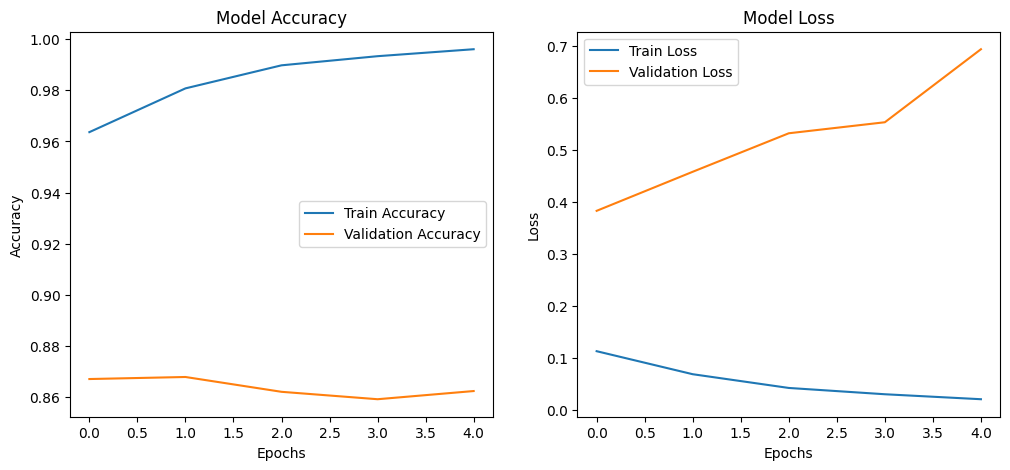

In [19]:
import matplotlib.pyplot as plt

# Plot training accuracy and loss
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test), callbacks=[checkpoint])

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


<hr>

### Testing
To evaluate the model, we need to predict the sentiment using our <b>x_test</b> data and comparing the predictions with <b>y_test</b> (expected output) data. Then, we calculate the accuracy of the model by dividing numbers of correct prediction with the total data. Resulted an accuracy of <b>86.28%</b>

In [12]:
y_pred = y_pred = (model.predict(x_test, batch_size=128) > 0.5).astype("int32")

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step
Correct Prediction: 8628
Wrong Prediction: 1372
Accuracy: 86.28


---

### Load Saved Model

Load saved model and use it to predict a movie review statement's sentiment (positive or negative).

In [13]:
loaded_model = load_model('models/LSTM.h5')

Receives a review as an input to be predicted

In [14]:
import time

# Get input
review = input("Movie Review: ").lower()

# Preprocess & Convert to Sequence in One Step
review_seq = pad_sequences(token.texts_to_sequences([review.split()]), maxlen=max_length, padding='post')

# Measure Prediction Time
start_time = time.time()
prediction = loaded_model.predict(review_seq)[0][0]
end_time = time.time()

# Print Result
sentiment = "Positive" if prediction > 0.5 else "Negative"
print(f"Predicted Sentiment: {sentiment} ({prediction:.2f}) in {end_time - start_time:.4f} seconds")


Movie Review: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Predicted Sentiment: Negative (0.37) in 0.3648 seconds


The input must be pre processed before it is passed to the model to be predicted

In [15]:
# Pre-process input
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)

words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]

print('Filtered: ', filtered)

Cleaned:  
Filtered:  ['']


Once again, we need to tokenize and encode the words. I use the tokenizer which was previously declared because we want to encode the words based on words that are known by the model.

In [16]:
tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
print(tokenize_words)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]]


This is the result of the prediction which shows the **confidence score** of the review statement.

In [17]:
result = loaded_model.predict(tokenize_words)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
[[0.3665142]]


If the confidence score is close to 0, then the statement is **negative**. On the other hand, if the confidence score is close to 1, then the statement is **positive**. I use a threshold of **0.7** to determine which confidence score is positive and negative, so if it is equal or greater than 0.7, it is **positive** and if it is less than 0.7, it is **negative**

In [18]:
if result >= 0.7:
    print('positive')
else:
    print('negative')

negative
